In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X= data.data
y = data.target

In [5]:
#splitting data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
#firstly applying linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
print(lr.coef_ , '\n\n' , lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214] 

 152.13623331746496


In [9]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 Score : ",r2_score(y_test , lr.predict(X_test)))
print("Root Mean Squared Error: " , np.sqrt(mean_squared_error(y_test , lr.predict(X_test))))

R2 Score :  0.5188113124539246
Root Mean Squared Error:  48.727137609532534


## Now Importing Ridge Regression

In [10]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=100000)

In [11]:
r.fit(X_train,y_train)

Ridge(alpha=100000)

In [12]:
print(r.coef_ , '\n\n' , r.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629] 

 151.83287930791352


In [13]:
print("R2 Score : " , r2_score(y_test , r.predict(X_test)))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test , r.predict(X_test))))

R2 Score :  -0.00042490200441935855
Root Mean Squared Error :  70.25956272917782


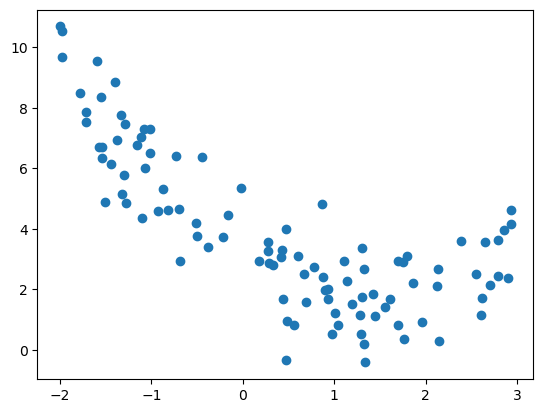

In [14]:
#generating a data points 
m = 100
x1 = 5 * np.random.rand(m , 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1,x2);

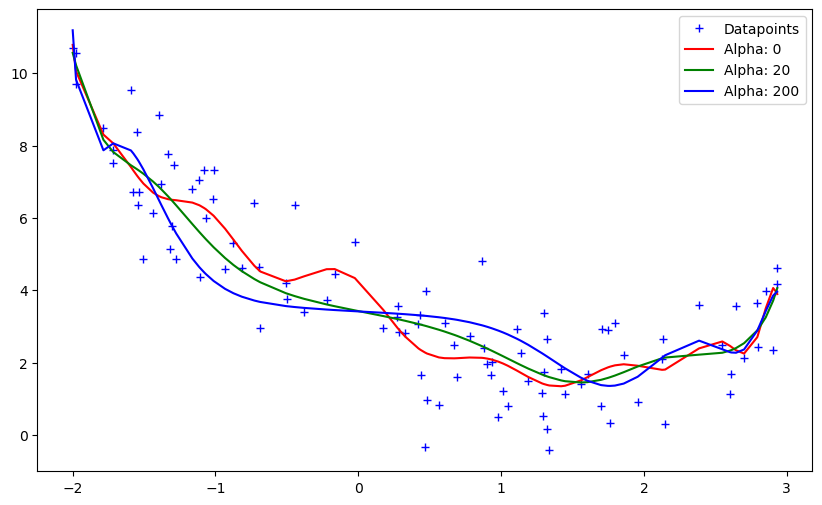

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
#Ridge Regularization